In [21]:
#This code is written for an EDA project

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [22]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df=pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [23]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [24]:
df=df.drop(['Engine Fuel Type','Vehicle Size','Vehicle Style','Number of Doors','Market Category'],axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [25]:
df=df.rename(columns={'Engine HP':'HP' , 'Engine Cylinders':'Cylinders','Transmission Type':'Type','Driven_Wheels':'Wheels','highway MPG':'Highway','city mpg':'City'})
df.head()

,Make,Model,Year,HP,Cylinders,Type,Wheels,Highway,City,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [26]:
df.isnull().any()

Make          False
Model         False
Year          False
HP             True
Cylinders      True
Type          False
Wheels        False
Highway       False
City          False
Popularity    False
MSRP          False
dtype: bool

In [27]:
df_clean=df.dropna()

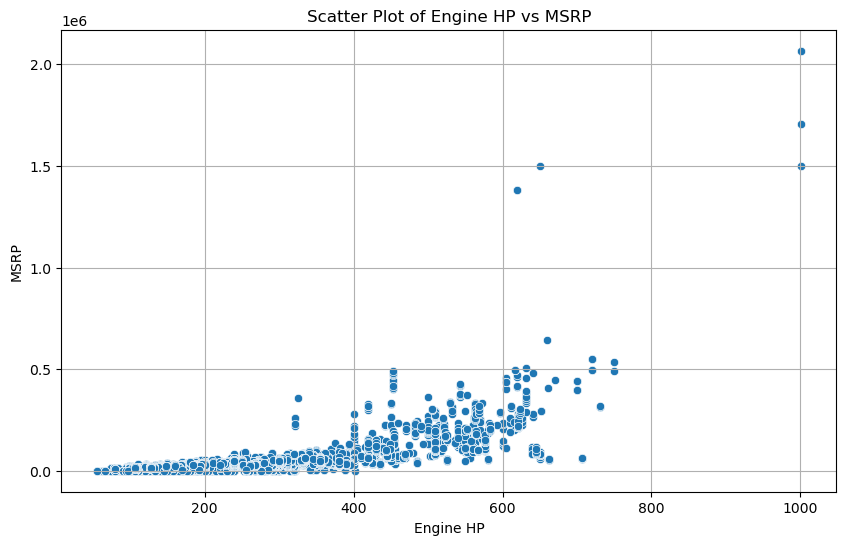

In [28]:
# Visualize the relationship between Engine HP and MSRP

plt.figure(figsize=(10,6))
sns.scatterplot(x='HP', y='MSRP', data=df_clean)
plt.title('Scatter Plot of Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.grid(True)
plt.show()

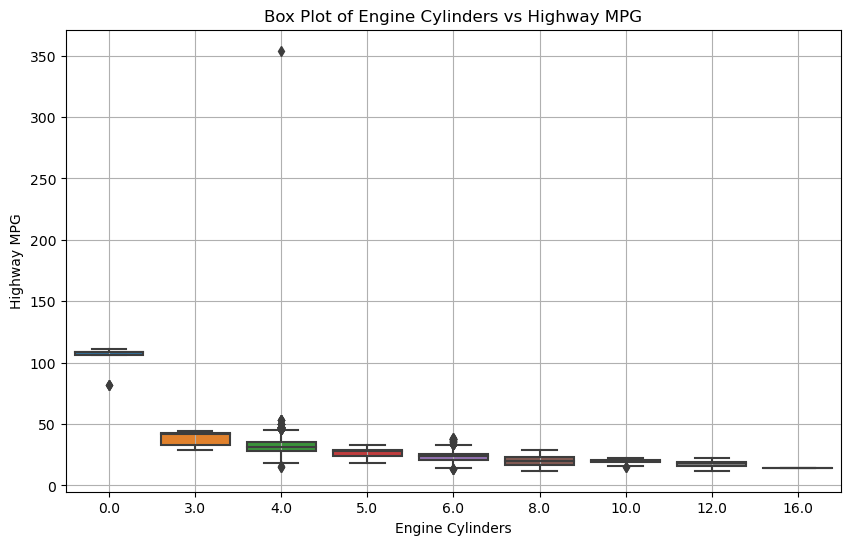

In [29]:
# Visualize the relationship between Cylinders and Highway MPG
plt.figure(figsize=(10,6))
sns.boxplot(x='Cylinders', y='Highway', data=df_clean)
plt.title('Box Plot of Engine Cylinders vs Highway MPG')
plt.xlabel('Engine Cylinders')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()

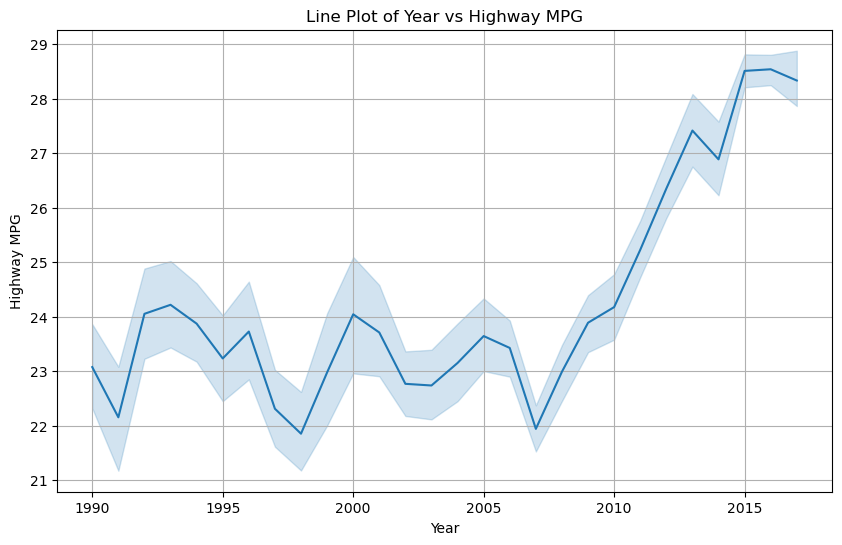

In [30]:
# Visualize the relationship between Year and Highway MPG
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Highway', data=df_clean)
plt.title('Line Plot of Year vs Highway MPG')
plt.xlabel('Year')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()

In [31]:
hp = df_clean['HP']
msrp = df_clean['MSRP']

correlation, p_value = pearsonr(hp, msrp)

correlation, p_value

(0.6622685485064346, 0.0)